# Exploring LEGO Sets: Uncovering Fun Facts and Insights

In this notebook we'll be exploring a **LEGO database**.  

If you're a parent, chances are you've stepped on a LEGO brick or two (ouch!) and witnessed the magic that these tiny pieces bring to your child's playtime. In this notebook, I'm going to channel that magic into data exploration, discovering intriguing facts and insights about the LEGO sets my kids own.

**Source of Exploration: The Rebrickable Dataset**

The LEGO dataset has been sourced from Rebrickable.com. Rebrickable is a great place to gather information about countless LEGO sets, parts, colors, themes, and more. With this data, we'll embark on a  quest to uncover insights, trends, and fun facts about the LEGO sets.

# The LEGO database

To enhance comprehension, below is a **ERD (Entity Relationship Diagram)** downloaded from the LEGO database at [Rebrickable](https://rebrickable.com/downloads/). 

This will aid in understanding the relationships between the various tables. Subsequently, I will proceed to denormalize the tables for more clarity.

![LEGO ERD](https://rebrickable.com/static/img/diagrams/downloads_schema_v3.png)

In [3]:
## importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings 
warnings.filterwarnings('ignore')

In [4]:
# directory/folder path
dir_path = '**/exploratory_data_analysis/lego/datasets'   ## update the path to your working directory where you have all files saved.

# list to store files
files = []

# Iterate directory to return all available files
for file_path in os.listdir(dir_path):
    # check if current file_path is a file
    if os.path.isfile(os.path.join(dir_path, file_path)):
        # add filename to list
        files.append(file_path)
print(files)

['sets.csv.gz', 'inventory_minifigs.csv.gz', 'elements.csv.gz', 'minifigs.csv.gz', 'themes.csv.gz', 'part_relationships.csv.gz', 'inventory_parts.csv.gz', 'colors.csv.gz', 'parts.csv.gz', 'part_categories.csv.gz', 'themes.csv', 'inventories.csv.gz']


In [5]:
##creating a df from every file in the working directory & printing them
for file in files:
    file_name = file.split('.')[0]
    globals()[f'df_{file_name}'] = pd.read_csv(
        f'{dir_path}/{file}', compression='gzip')
    print(f'df_{file_name}')

df_sets
df_inventory_minifigs
df_elements
df_minifigs
df_themes
df_part_relationships
df_inventory_parts
df_colors
df_parts
df_part_categories
df_themes
df_inventories


In [6]:
## exploring LEGO themes
df_themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [7]:
#counting the number of Themes
len(df_themes)

466

In [8]:
#counting unique Themes
df_themes.nunique()

id           466
name         383
parent_id     55
dtype: int64

# Ninjago Collection

By far, Ninjago are the most popular LEGO's at home. So I will explore this theme and see what I come up with.

In [9]:
## filtering all NINJAGO themes
df_ninjago = df_themes[df_themes['name'].str.contains('Ninjago')]
df_ninjago

,id,name,parent_id
215,435,Ninjago,NaN
326,597,Ninjago,591.0
343,616,The LEGO Ninjago Movie,435.0
345,618,The LEGO Ninjago Movie,535.0


I'll use the df created in previous step and join it with the df containing the different Sets (df_sets). The result is a **dataframe containing all ninjago sets**. 

In [10]:
##Joining the Sets & Themes df
df_sets_ninjago = df_sets.merge(df_ninjago, left_on='theme_id', right_on='id', how='right', suffixes=['_set', '_theme'])

#droppping unnecessary columns
df_sets_ninjago = df_sets_ninjago.drop(columns=['id','parent_id', 'theme_id'], axis=1)

df_sets_ninjago.head()

,set_num,name_set,year,num_parts,img_url,name_theme
0,111901-1,Garmadon,2019,10,https://cdn.rebrickable.com/media/sets/111901-...,Ninjago
1,111902-1,Wu,2019,6,https://cdn.rebrickable.com/media/sets/111902-...,Ninjago
2,111903-1,Kai vs. Wyplash,2019,13,https://cdn.rebrickable.com/media/sets/111903-...,Ninjago
3,111904-1,Jay vs. Lasha,2019,12,https://cdn.rebrickable.com/media/sets/111904-...,Ninjago
4,112005-1,Cole vs. Nindroid,2020,20,https://cdn.rebrickable.com/media/sets/112005-...,Ninjago


In [11]:
## Couting the total number Ninjago sets
print(f"There are a total of {len(df_sets_ninjago)} Ninjago sets in the collection" ) ## total number of ninjago sets = 556

There are a total of 556 Ninjago sets in the collection


In [12]:
##Couting the total number of parts from all Ninjago sets
print(f"The total Ninjago collection contains: {df_sets_ninjago['num_parts'].sum()} parts" ) ## total number of lego parts = 139.858

The total Ninjago collection contains: 139858 parts


In [13]:
##Couting the average number of parts in Ninjago sets
print(f"Ninjago sets contain in average: {round(df_sets_ninjago['num_parts'].sum()/len(df_sets_ninjago), 2)} parts" )

Ninjago sets contain in average: 251.54 parts


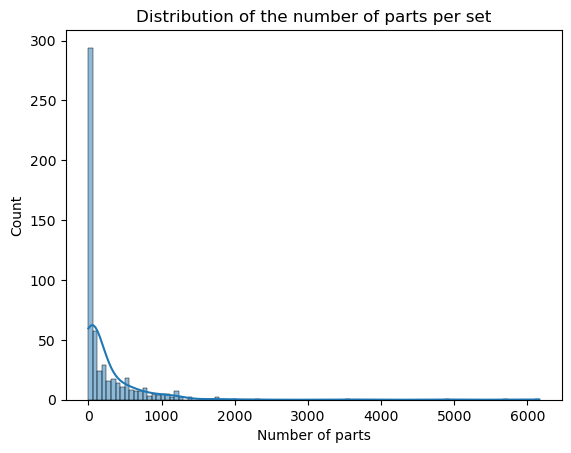

In [43]:
## plotting a histogram of number of parts
sns.histplot(x='num_parts', data=df_sets_ninjago, bins=100, kde=True)
plt.xlabel('Number of parts')
plt.ylabel('Count')
plt.title('Distribution of the number of parts per set')
plt.show()

In [15]:
## first release of a ninjago set
print(f"First Ninjago set was released in: {df_sets_ninjago['year'].min()}")
print(f"Latest Ninjago set was released in: {df_sets_ninjago['year'].max()}")

First Ninjago set was released in: 2011
Latest Ninjago set was released in: 2023


In [16]:
## MAX and MIN number of parts in the Ninjago sets 
print(f"Min number of parts: {df_sets_ninjago['num_parts'].min()}")
print(f"Max number of parts: {df_sets_ninjago['num_parts'].max()}")

Min number of parts: 0
Max number of parts: 6163


I'm now curious which is the Set with the **maximum number of pieces**. So let's explore it:

In [17]:
max_numb_parts = df_sets_ninjago['num_parts'].max()

max_ninjago_set = df_sets_ninjago[df_sets_ninjago['num_parts'] == max_numb_parts]
max_ninjago_set

,set_num,name_set,year,num_parts,img_url,name_theme
327,71799-1,NINJAGO City Markets,2023,6163,https://cdn.rebrickable.com/media/sets/71799-1...,Ninjago


**Nice! That's a set my kids would love!**

![NINJAGO City Markets](https://cdn.rebrickable.com/media/sets/71799-1.jpg)



# Summary Statistics
Printing the **summary statistics** of the df for the numerical variables. Some of the steps above could be ommited by just printing below code.


In [18]:
#printing the summary statistics
df_sets_ninjago.describe()

,year,num_parts
count,556.000000,556.000000
mean,2017.417266,251.543165
std,3.551727,538.548195
min,2011.000000,0.000000
25%,2015.000000,13.000000
50%,2017.000000,54.000000
75%,2020.000000,298.000000
max,2023.000000,6163.000000


# Some further data exploration 

We group the data by **release year** to explore which has been LEGO's strategy.

In [19]:
## summary statistics per release year
grouped_year = df_sets_ninjago.groupby('year').describe()

grouped_year

num_parts                                                              
         count        mean          std   min     25%    50%     75%     max
year                                                                        
2011      43.0  145.906977   230.274868   0.0   21.00   32.0  171.50  1174.0
2012      47.0  141.680851   208.561857   0.0   21.00   28.0  226.50   915.0
2013       7.0  237.714286   173.107591  36.0  136.50  210.0  290.00   565.0
2014      10.0  393.600000   355.488772  10.0  198.75  293.5  493.50  1224.0
2015      53.0  229.471698   376.315723   0.0   27.00   54.0  236.00  2030.0
2016      40.0  221.650000   313.616584   1.0   14.75   41.5  344.75  1255.0
2017      81.0  266.185185   651.961772   0.0    8.00   14.0  233.00  4873.0
2018      49.0  268.632653   585.438215   0.0   15.00   66.0  222.00  3555.0
2019      50.0  210.400000   324.296161   6.0   11.25   67.0  217.75  1223.0
2020      47.0  252.148936   377.723500   6.0   12.50   56.0  362.00  1783.0
2021      45.0  358.111111   875.453577   7.0   11.00   66.0  449.00  5709.0
2022      45.0  235.822222   359.604915   0.0   13.00   33.0  279.00  1396.0
2023      39.0  422.435897  1020.195693   0.0   14.00   94.0  353.50  6163.0

Plotting the **number of sets** released per year and **average number of parts** in each set.

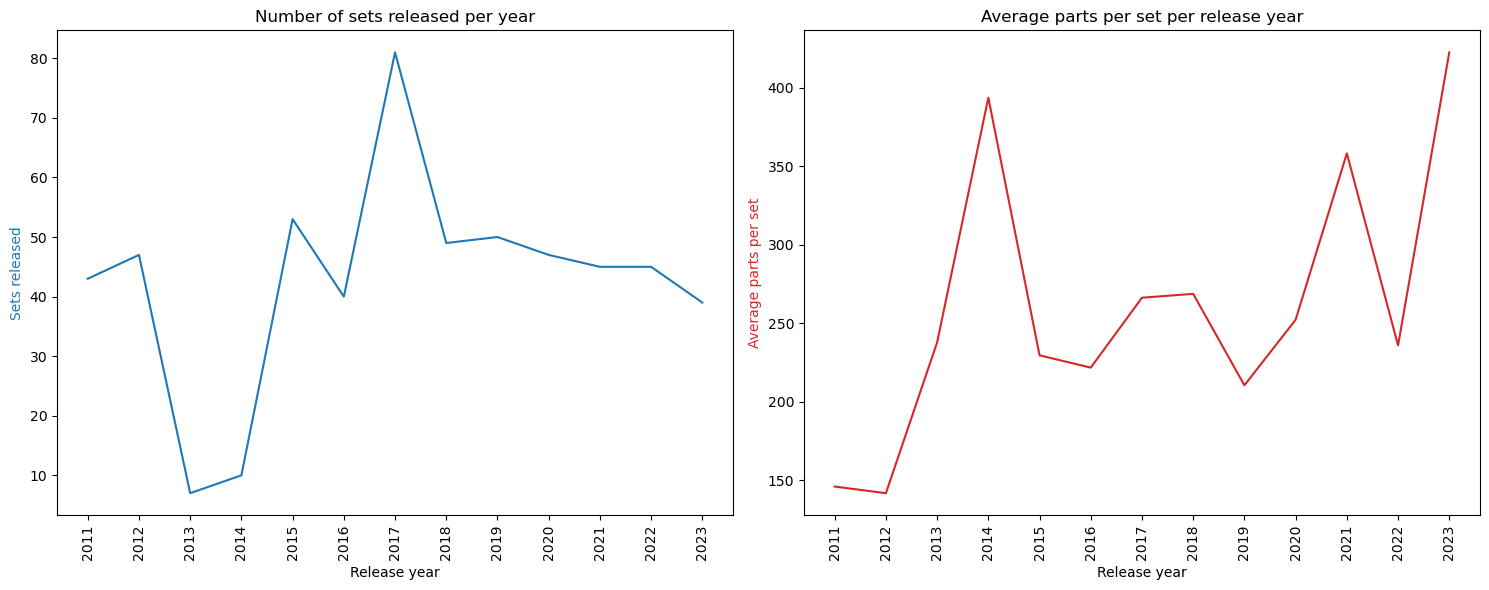

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Plotting the number of sets for each  year
ax1.plot(grouped_year.index, grouped_year[('num_parts', 'count')], color='tab:blue')
ax1.set_xlabel('Release year')
ax1.set_ylabel('Sets released', color='tab:blue')
ax1.set_title('Number of sets released per year')

# Rotate x-axis labels for better readability
ax1.set_xticks(grouped_year.index)
ax1.set_xticklabels(grouped_year.index, rotation=90)

# Plotting the average parts per set for each year
ax2.plot(grouped_year.index, grouped_year[('num_parts', 'mean')], color='tab:red')
ax2.set_xlabel('Release year')
ax2.set_ylabel('Average parts per set', color='tab:red')
ax2.set_title('Average parts per set per release year')

# Rotate x-axis labels for better readability
ax2.set_xticks(grouped_year.index)
ax2.set_xticklabels(grouped_year.index, rotation=90)

plt.tight_layout()  
plt.show()


At a first glance, it would seem that as the number of sets released goes down, the average number of parts goes up.

We can measure the strenght of this relationship by **calculating the correlatation coefficient** between both variables.

Correlation coefficient: -0.2582


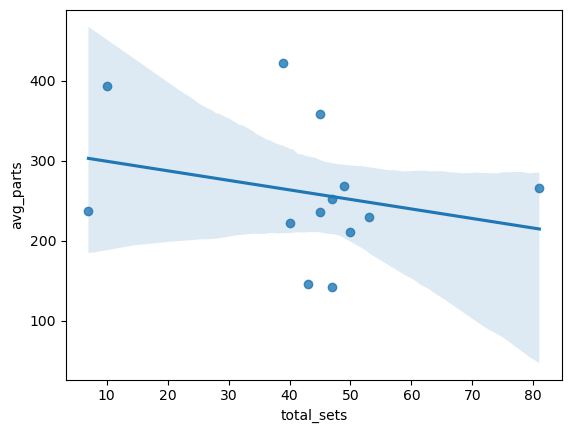

In [21]:
grouped_year_2 = df_sets_ninjago.groupby('year').agg(total_sets=('year', 'count'), avg_parts=('num_parts', 'mean'))

grouped_year_2

sns.regplot(x='total_sets', y='avg_parts',  data=grouped_year_2)
plt.plot()


corr_coef = f"Correlation coefficient: {round(grouped_year_2['total_sets'].corr(grouped_year_2['avg_parts']),4)}"

print(corr_coef)

A **correlation coefficient of -0.2582** shows a **weak negative correlation** between the two variables.  

# Exploring my kid's LEGO collection

Now that we have an understanding of the Ninjago collection, let's dive into my kid's collection.

With my kids help, I managed to collect most of the codes for the different sets they own.  

In [22]:
##List of LEGO NINJAGO sets my kid's own
lego_purchased_codes = ['71735', '71733','71731','71730','71718','71706','71708','71707',
                  '71761','71762','71757','71766','71735','71750','71752','71745',
                  '71745','71746','71757','71788','71769','71770', '71761','71762']

In [23]:
##Some set codes have a prefix based on location or set version. Not sure which one's they own so for the purpose of this analysis I'll strip it. 
df_sets_ninjago['set_prefix'] = df_sets_ninjago['set_num'].str.split('-', n=1).str[0]

#Filtering the df to include only the owned sets
lego_purchased_ninjago = df_sets_ninjago[df_sets_ninjago['set_prefix'].isin(lego_purchased_codes)]

lego_purchased_ninjago.head()

,set_num,name_set,year,num_parts,img_url,name_theme,set_prefix
245,71706-1,Cole's Speeder Car,2020,52,https://cdn.rebrickable.com/media/sets/71706-1...,Ninjago,71706
246,71707-1,Kai's Mech Jet,2020,226,https://cdn.rebrickable.com/media/sets/71707-1...,Ninjago,71707
247,71708-1,Gamer's Market,2020,228,https://cdn.rebrickable.com/media/sets/71708-1...,Ninjago,71708
257,71718-1,Wu's Battle Dragon,2020,322,https://cdn.rebrickable.com/media/sets/71718-1...,Ninjago,71718
262,71730-1,Epic Battle Set - Kai vs. Skulkin,2021,70,https://cdn.rebrickable.com/media/sets/71730-1...,Ninjago,71730


# Total number of LEGO Ninjago sets

In [24]:
##Counting the number of sets they own
total_lego_ninjago_owned = len(lego_purchased_ninjago)

print(f"My kids own a total of {total_lego_ninjago_owned} Ninjago sets.")

My kids own a total of 19 Ninjago sets.


# Total number of LEGO Ninjago parts

In [25]:
## Counting the number of parts from these sets
total_lego_parts = lego_purchased_ninjago['num_parts'].sum()

print(f"My kids own a total of {total_lego_parts} parts corresponding to Ninjago sets.") ##total LEGO ninjago parts owned 4.420

My kids own a total of 4420 parts corresponding to Ninjago sets.


# Total number of LEGO Ninjago sets per YEAR

In [26]:
##Counting the number of Sets & total_parts grouped by release YEAR
total_lego_per_year = lego_purchased_ninjago[['year','num_parts']].groupby('year').agg(total_sets=('year', 'count'), total_parts=('num_parts', 'sum'))

total_lego_per_year

,total_sets,total_parts
year,,
2020,4,828
2021,8,1761
2022,6,1767
2023,1,64


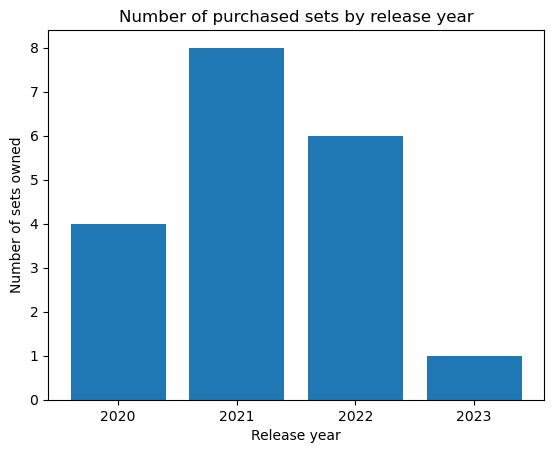

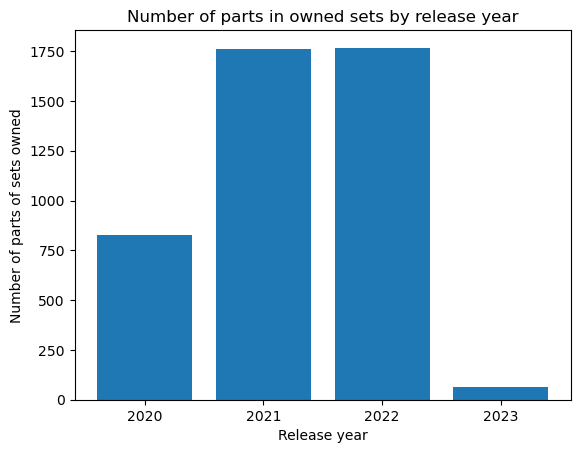

In [27]:
##Plotting the number of sets & parts by release year

years = total_lego_per_year.index

plt.bar(total_lego_per_year.index, total_lego_per_year['total_sets'])
plt.xticks(years)
plt.title('Number of purchased sets by release year')
plt.xlabel('Release year')
plt.ylabel('Number of sets owned')
plt.show()

plt.bar(total_lego_per_year.index, total_lego_per_year['total_parts'])
plt.title('Number of parts in owned sets by release year')
plt.xlabel('Release year')
plt.ylabel('Number of parts of sets owned')
plt.xticks(years)
plt.show()

# What happened in 2023? 

It seems the interest in Ninjago took a dip in 2023. Let me explore further as it might not be the case.

In [28]:
grouped = lego_purchased_ninjago.groupby('year').describe()

grouped

num_parts                                                        
         count     mean         std   min     25%    50%    75%    max
year                                                                  
2020       4.0  207.000  112.623266  52.0  182.50  227.0  251.5  322.0
2021       8.0  220.125  159.787750  60.0   69.00  205.5  308.0  506.0
2022       6.0  294.500  252.844419  57.0  122.75  236.5  363.0  747.0
2023       1.0   64.000         NaN  64.0   64.00   64.0   64.0   64.0

After grouping by release year, I can see that the **mean of number of parts has gone up every year** until 2023. 

Without access to additional info to analyze (ex. purchase date) I could only do some educated guesses. I could think, that some sets purchased in 2023 could be from 2022 releases. 

# Most popular ninja (by sets)

In [29]:
## Making a list of the names of the Ninjago characters 
ninja_names = ['Kai', 'Jay', 'Lloyd', 'Cole', 'Zane','Nia','Wu' ]

In [30]:
## iterating over every name_set to count and identify to which character it corresponds

ninja_dict = {}
for ninja in ninja_names: 
    count = lego_purchased_ninjago[lego_purchased_ninjago['name_set'].str.contains(ninja)]
    ninja_dict[ninja] = len(count)

print(ninja_dict)

{'Kai': 3, 'Jay': 0, 'Lloyd': 5, 'Cole': 3, 'Zane': 3, 'Nia': 0, 'Wu': 1}


In [31]:
## creating a df with information on the characters collected in above step
sets_by_ninja = pd.DataFrame(ninja_dict.items(), columns=['ninja_name','quantity'])

sets_by_ninja = sets_by_ninja.sort_values('quantity', ascending=False)

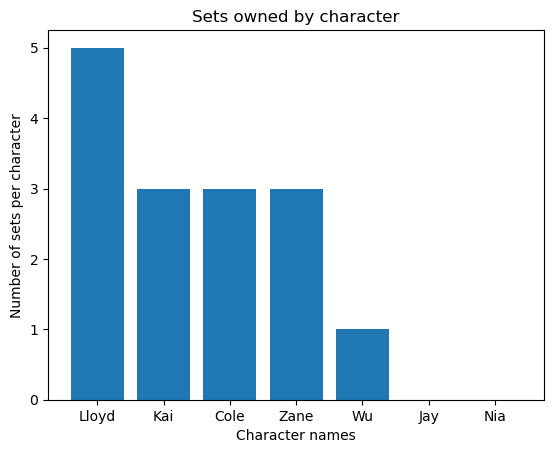

In [32]:
## plotting the number of Sets for each ninjago character
plt.bar(sets_by_ninja['ninja_name'], sets_by_ninja['quantity'])
plt.title('Sets owned by character')
plt.xlabel('Character names')
plt.ylabel('Number of sets per character')
plt.show()

However, this might not be the most accurate approach as some sets include various minifigs. 

So I'll explore futher.

# Joining minifigs to accurately see which ninja's they own

From the **inventories** and **inventory_minifigs** dataframes we can know which minifigs are included in each set.

The next step is to denormalize the database so that we can understand in a more clear way the information.

In [33]:
#Joining minifigs and inventory_minifigs
df_minifig = df_minifigs.merge(df_inventory_minifigs, on='fig_num')

#Joining minifigs and inventory_minifigs AND inventories
df_minifig_inv = df_minifig.merge(df_inventories, left_on='inventory_id', right_on='id')

#Joining previous dfs with SETS (ninjagos_owned)
df_owned_joined = df_minifig_inv.merge(lego_purchased_ninjago, on='set_num', suffixes=["_minifig", "_sets"])

df_owned_joined.head()

,fig_num,name,num_parts_minifig,img_url_minifig,inventory_id,quantity,id,version,set_num,name_set,year,num_parts_sets,img_url_sets,name_theme,set_prefix
0,fig-002152,Jay in Rebooted Outfit (Legacy) - MANTER Torso,5,https://cdn.rebrickable.com/media/sets/fig-002...,87174,1,87174,2,71735-1,Tournament of Elements,2021,292,https://cdn.rebrickable.com/media/sets/71735-1...,Ninjago,71735
1,fig-009091,Kai with Hair (Legacy),5,https://cdn.rebrickable.com/media/sets/fig-009...,87174,1,87174,2,71735-1,Tournament of Elements,2021,292,https://cdn.rebrickable.com/media/sets/71735-1...,Ninjago,71735
2,fig-010976,Eyezor - Legacy,4,https://cdn.rebrickable.com/media/sets/fig-010...,87174,1,87174,2,71735-1,Tournament of Elements,2021,292,https://cdn.rebrickable.com/media/sets/71735-1...,Ninjago,71735
3,fig-010979,"Lloyd - Gold, with Hair",5,https://cdn.rebrickable.com/media/sets/fig-010...,87174,1,87174,2,71735-1,Tournament of Elements,2021,292,https://cdn.rebrickable.com/media/sets/71735-1...,Ninjago,71735
4,fig-010980,Bolobo,4,https://cdn.rebrickable.com/media/sets/fig-010...,87174,1,87174,2,71735-1,Tournament of Elements,2021,292,https://cdn.rebrickable.com/media/sets/71735-1...,Ninjago,71735


In [34]:
## counting the number of minifigs they own
print(f"My kids own a total of {len(df_owned_joined)} minifigs")

My kids own a total of 74 minifigs


In [35]:
##Exploring if each minifig is unique. 
df_owned_joined['name'].unique

<bound method Series.unique of 0     Jay in Rebooted Outfit (Legacy) - MANTER Torso
1                             Kai with Hair (Legacy)
2                                    Eyezor - Legacy
3                            Lloyd - Gold, with Hair
4                                             Bolobo
                           ...                      
69                                  General Aspheera
70                                 Golden Dragon Kai
71                           Zane, Crystalized Armor
72                                  General Vangelis
73                                Golden Dragon Cole
Name: name, Length: 74, dtype: object>

In [36]:
## count the number of minifigs for each ninjago character and create a dictionary out of it

ninja_dict1 = {}
for ninja in ninja_names: 
    count = df_owned_joined[df_owned_joined['name'].str.contains(ninja)]
    ninja_dict1[ninja] = len(count)

print(ninja_dict1)

minifigs = pd.DataFrame(ninja_dict1.items(), columns=['ninja_name','quantity'])
minifigs = minifigs.sort_values('quantity', ascending=False)
minifigs

{'Kai': 7, 'Jay': 5, 'Lloyd': 9, 'Cole': 6, 'Zane': 5, 'Nia': 0, 'Wu': 1}


,ninja_name,quantity
2,Lloyd,9
0,Kai,7
3,Cole,6
1,Jay,5
4,Zane,5
6,Wu,1
5,Nia,0


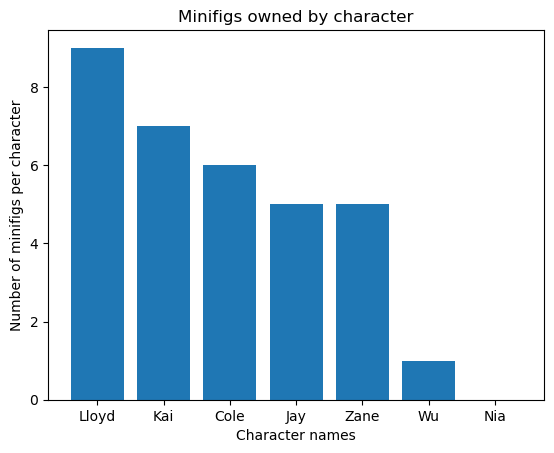

In [37]:
## proceed to plot again what qty they own of each character. This seems more accurate now.
plt.bar(minifigs['ninja_name'], minifigs['quantity'])
plt.title('Minifigs owned by character')
plt.xlabel('Character names')
plt.ylabel('Number of minifigs per character')
plt.show()

# Counting most popular LEGO brick colors

In [38]:
#joining previous super join with inventory_parts
df_inventories_parts_merged = df_owned_joined.merge(df_inventory_parts, left_on='id', right_on='inventory_id')


#Joining with colors df
df_colors_merged = df_inventories_parts_merged.merge(df_colors, left_on='color_id', right_on='id')
df_colors_merged.head()


,fig_num,name_x,num_parts_minifig,img_url_minifig,inventory_id_x,quantity_x,id_x,version,set_num,name_set,...,inventory_id_y,part_num,color_id,quantity_y,is_spare,img_url,id_y,name_y,rgb,is_trans
0,fig-002152,Jay in Rebooted Outfit (Legacy) - MANTER Torso,5,https://cdn.rebrickable.com/media/sets/fig-002...,87174,1,87174,2,71735-1,Tournament of Elements,...,87174,11211,0,1,f,https://cdn.rebrickable.com/media/parts/elemen...,0,Black,05131D,f
1,fig-002152,Jay in Rebooted Outfit (Legacy) - MANTER Torso,5,https://cdn.rebrickable.com/media/sets/fig-002...,87174,1,87174,2,71735-1,Tournament of Elements,...,87174,11476,0,4,f,https://cdn.rebrickable.com/media/parts/elemen...,0,Black,05131D,f
2,fig-002152,Jay in Rebooted Outfit (Legacy) - MANTER Torso,5,https://cdn.rebrickable.com/media/sets/fig-002...,87174,1,87174,2,71735-1,Tournament of Elements,...,87174,13564,0,1,f,https://cdn.rebrickable.com/media/parts/elemen...,0,Black,05131D,f
3,fig-002152,Jay in Rebooted Outfit (Legacy) - MANTER Torso,5,https://cdn.rebrickable.com/media/sets/fig-002...,87174,1,87174,2,71735-1,Tournament of Elements,...,87174,13564,0,1,t,https://cdn.rebrickable.com/media/parts/elemen...,0,Black,05131D,f
4,fig-002152,Jay in Rebooted Outfit (Legacy) - MANTER Torso,5,https://cdn.rebrickable.com/media/sets/fig-002...,87174,1,87174,2,71735-1,Tournament of Elements,...,87174,14716,0,8,f,https://cdn.rebrickable.com/media/parts/elemen...,0,Black,05131D,f


In [39]:
## colors expressed in percentages
colors_percentage = df_colors_merged[['name_y', 'rgb']].value_counts()

colors_df = pd.DataFrame(colors_percentage)
colors_df.reset_index(inplace=True)
colors_df.columns = ['color', 'rgb', 'qty']

colors_df['pct'] = colors_df['qty']/sum(colors_df['qty'])

#displaying first 10 most popular colors
first_ten_colors = colors_df.iloc[:10]

## adding all remaining colors
last_colors = colors_df.iloc[10:]
sum_other_colors = last_colors[['qty', 'pct']].sum()

## adding all remaining colors as a sum to first_ten_colors
other_color_row = pd.Series({'color': 'other', 'rgb': '1D4A5B', 'qty': sum_other_colors['qty'], 'pct': sum_other_colors['pct']})
first_ten_colors = first_ten_colors.append(other_color_row, ignore_index=True)

first_ten_colors

,color,rgb,qty,pct
0,Black,05131D,2049.0,0.237813
1,Pearl Gold,AA7F2E,863.0,0.100162
2,Dark Bluish Gray,6C6E68,712.0,0.082637
3,White,FFFFFF,658.0,0.076370
4,Light Bluish Gray,A0A5A9,489.0,0.056755
5,Red,C91A09,462.0,0.053621
6,Dark Blue,0A3463,459.0,0.053273
7,Reddish Brown,582A12,350.0,0.040622
8,Tan,E4CD9E,271.0,0.031453
9,Bright Green,4B9F4A,214.0,0.024838


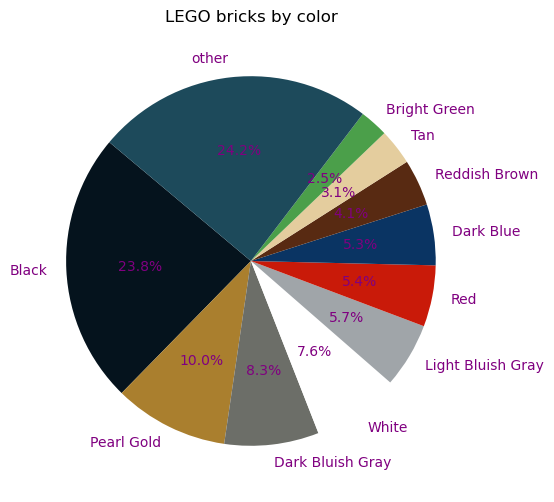

In [40]:
#Plotting a pie chart with information on the most popular brick colors
labels = first_ten_colors['color']
sizes = first_ten_colors['pct']
hex_colors = first_ten_colors['rgb']

# Convert hexadecimal RGB values to RGB values between 0 and 1
colors = [(int(hex_color[0:2], 16)/255, int(hex_color[2:4], 16)/255, int(hex_color[4:6], 16)/255) for hex_color in hex_colors]


# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',startangle=140, textprops={'color': 'purple'}) 

plt.title("LEGO bricks by color")
plt.show()

**If you've enjoyed this notebook, feel free to connect on [LinkedIn](https://www.linkedin.com/in/jonathan-kraayenbrink/)  and [GitHub](https://github.com/kraayenjon).**